In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math

In [2]:
os.chdir("/Users/sakshikumar/Documents/UCD/03. WQ 2025/452 ML/Project")

In [3]:
okcupid = pd.read_csv('okcupid_profiles.csv')
okcupid.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [5]:
okcupid.describe(include='all')

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
count,59946.000000,59946,59946,59946,54650,35551,56961,45866,53318,54266,...,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343
unique,NaN,5,2,3,12,18,6,3,32,217,...,54347,51516,48625,43520,49257,48961,43583,45548,39323,45440
top,NaN,single,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,.,enjoying it.,listening,my smile,ask me,family,my future,out with friends,ask me,you want to.
freq,NaN,55697,35829,51606,14652,16585,41780,37724,23959,32831,...,12,61,82,529,16,6,161,89,45,200
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(okcupid.columns)
len(okcupid.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')


31

#### Just features

In [7]:
okc_features = okcupid[okcupid.columns[:-10]]
okc_features.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english


#### Duplicates

In [8]:
dups = okc_features.drop_duplicates()
dups.shape == okc_features.shape            # No duplicates

True

#### Missing values

In [9]:
# print(okcupid.isna().sum().sort_values(ascending=False))
print(okc_features.isna().sum().sort_values(ascending=False))

offspring      35561
diet           24395
religion       20226
pets           19921
drugs          14080
sign           11056
job             8198
education       6628
ethnicity       5680
smokes          5512
body_type       5296
drinks          2985
speaks            50
height             3
location           0
last_online        0
income             0
status             0
orientation        0
sex                0
age                0
dtype: int64


In [26]:
cols = okc_features.columns
isna = []

for x in okc_features.columns:
    isna.append((okc_features[x].isna().sum()/len(okc_features[x])*100).round(0))

isna_df = pd.DataFrame({'Columns': cols, 'Percentage of missing values': isna})
isna_df = isna_df.sort_values(by='Percentage of missing values', ascending=False)
isna_df

,Columns,Percentage of missing values
15,offspring,59.0
5,diet,41.0
17,religion,34.0
16,pets,33.0
7,drugs,23.0
18,sign,18.0
12,job,14.0
8,education,11.0
19,smokes,9.0
4,body_type,9.0


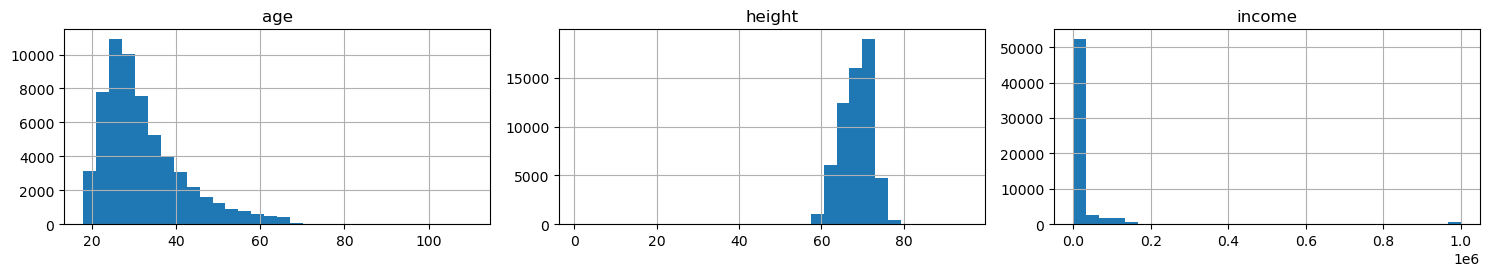

In [12]:
numeric_cols = okc_features.select_dtypes(include=['number'])
numeric_cols.hist(figsize=(15, 10), bins=30, layout=(4, 3))  
plt.tight_layout()
plt.show()

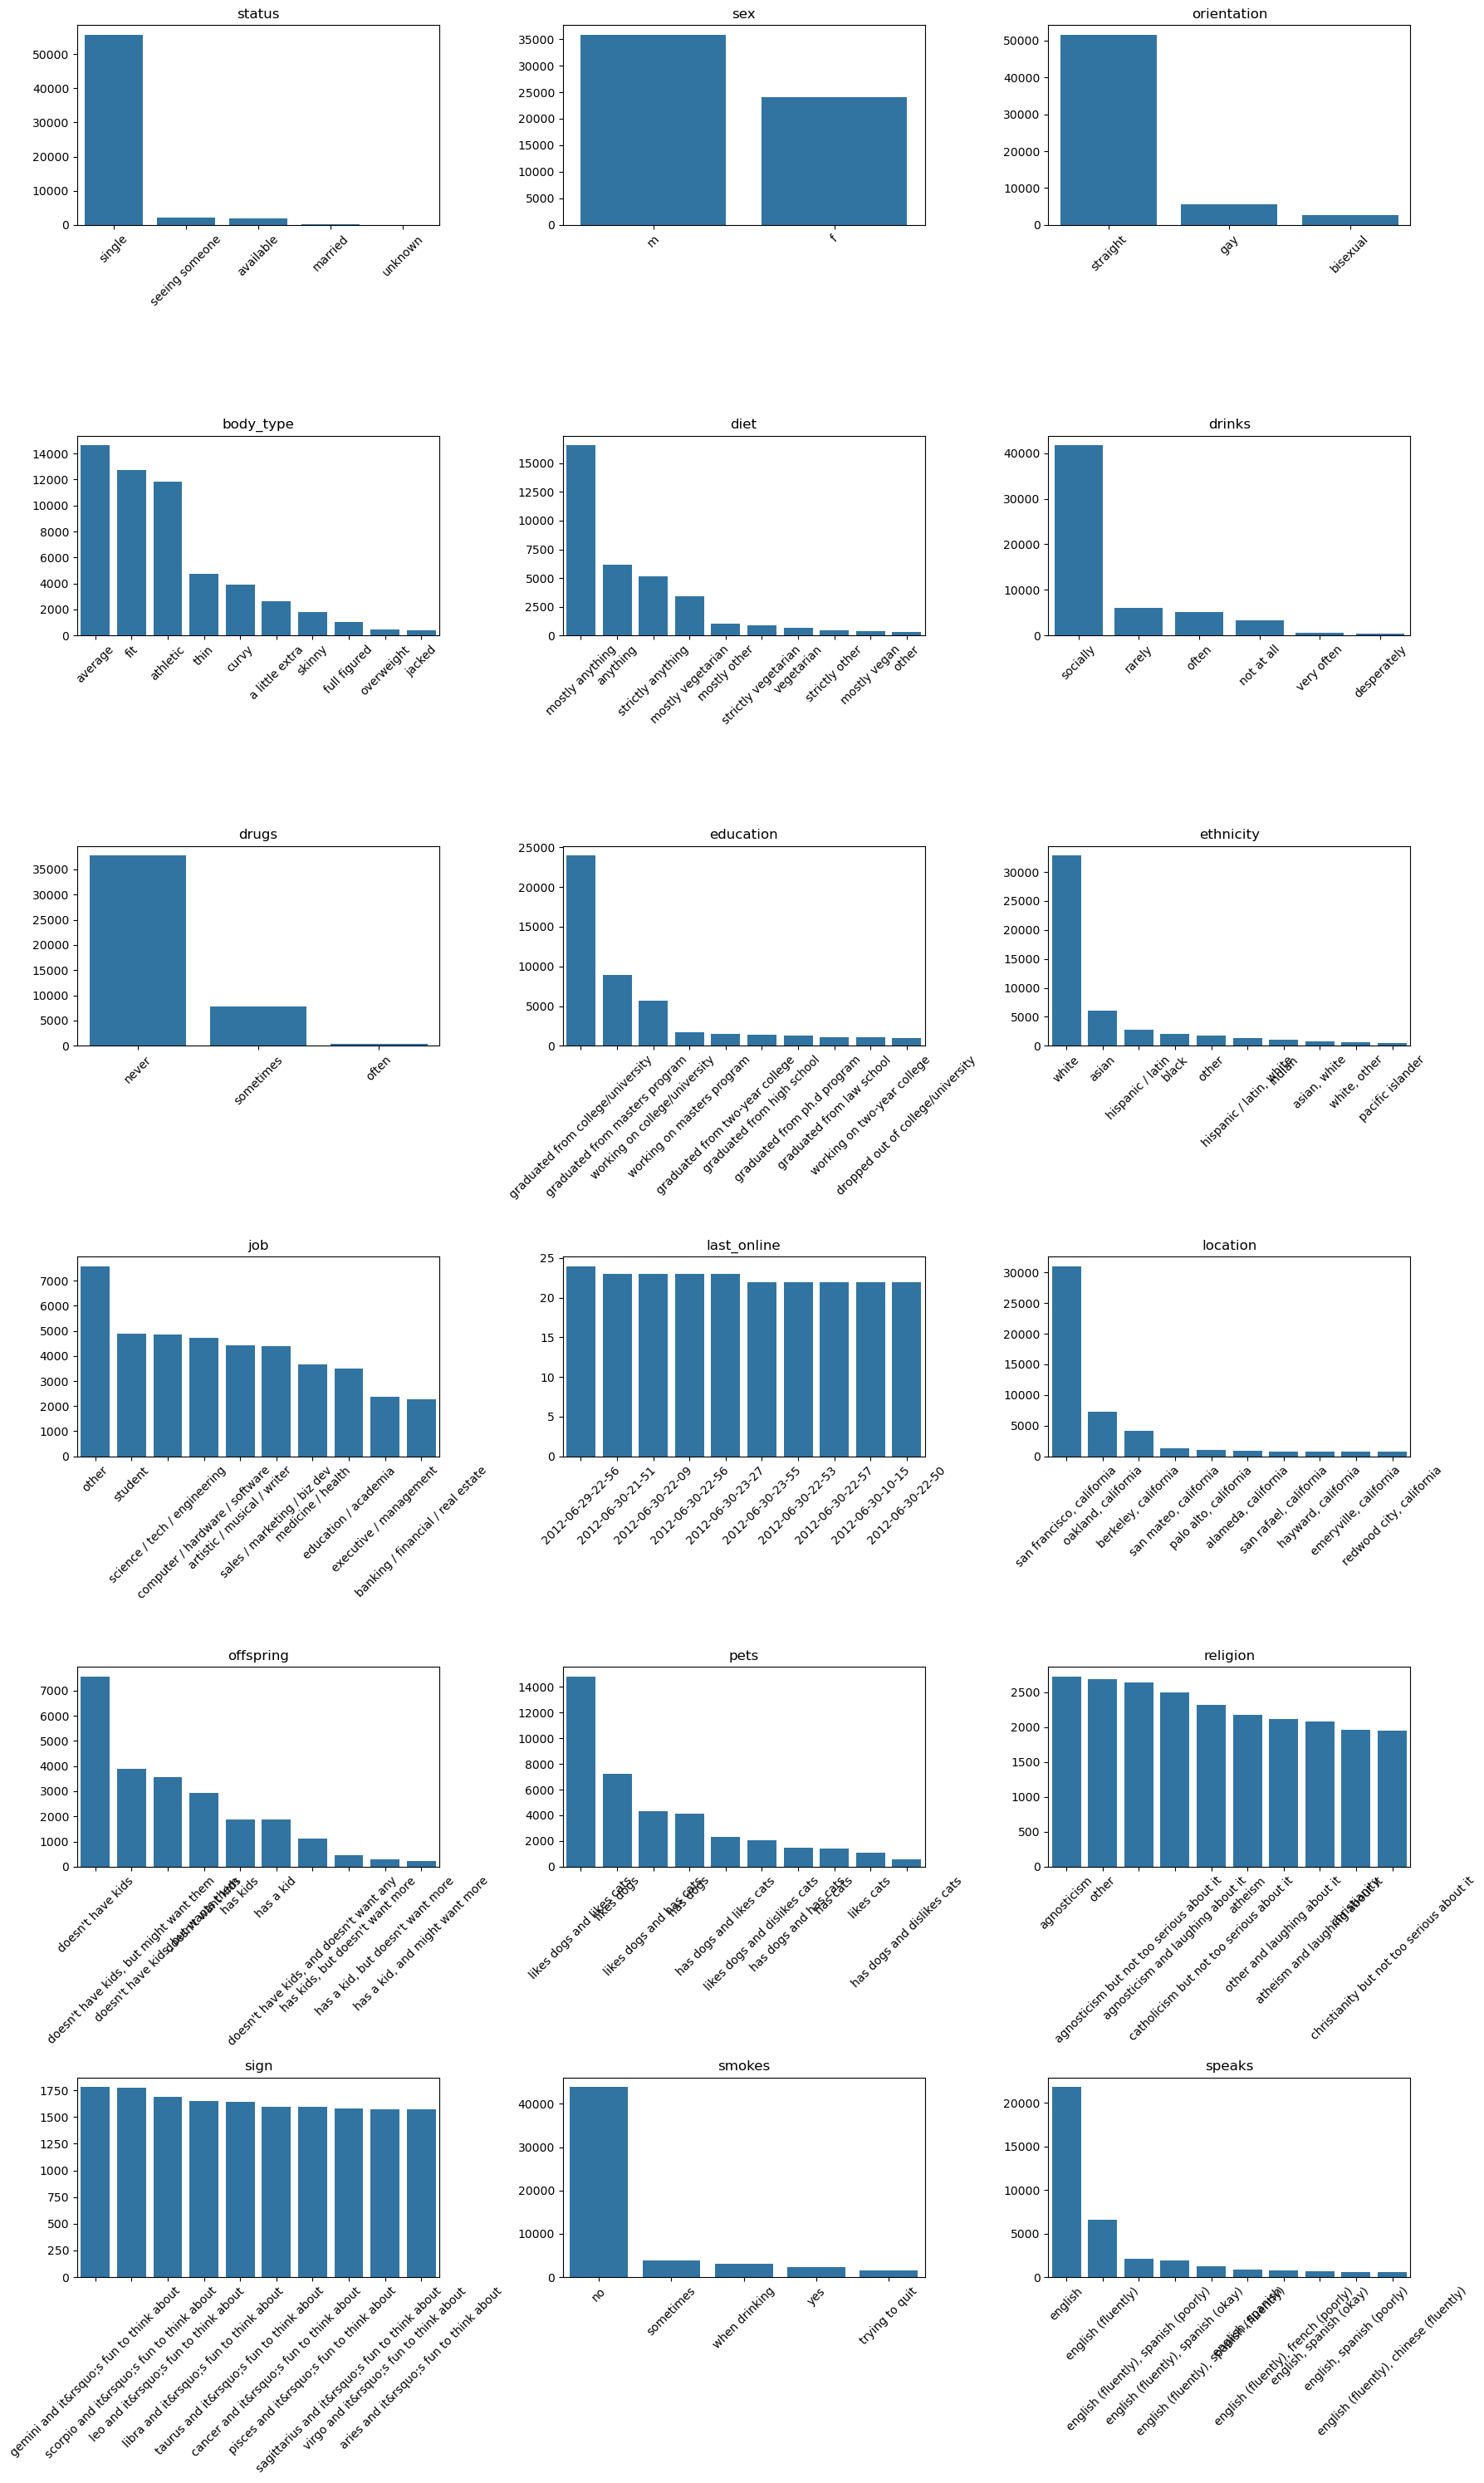

In [13]:
# Categorical columns only
object_cols = okc_features.select_dtypes(include=['object'])

num_cols = len(object_cols.columns)
rows = math.ceil(num_cols / 3)  # Adjust to have multiple rows
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))  
axes = axes.flatten()

# Plot each column
for i, column in enumerate(object_cols.columns):
    value_counts = object_cols[column].value_counts().head(10)  # Show top 10 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("")  # Remove x-axis label
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)  # Rotate labels

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
uniques = []
for i in object_cols.columns:
    uniques.append(object_cols[i].nunique())
uniques

uniques_df = pd.DataFrame({'Columns': object_cols.columns, 'No. of uniques': uniques})
uniques_df = uniques_df.sort_values(by='No. of uniques', ascending=False)
uniques_df

,Columns,No. of uniques
10,last_online,30123
17,speaks,7647
8,ethnicity,217
11,location,199
15,sign,48
14,religion,45
7,education,32
9,job,21
4,diet,18
12,offspring,15


#### Correlation

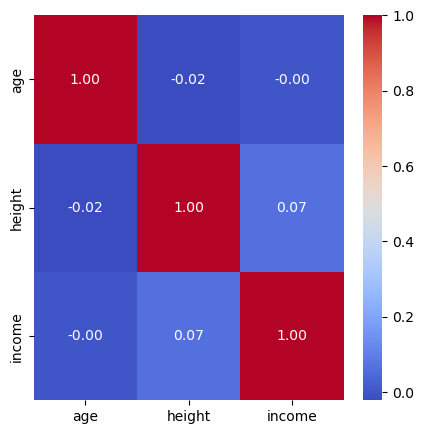

In [15]:
corr_1 = numeric_cols.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in object_cols.columns:
    object_cols[i] = le.fit_transform(object_cols[i])

In [17]:
object_cols.head()

,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,3,1,2,0,10,4,0,24,98,19,26756,175,2,14,3,16,1,1
1,3,1,2,2,6,2,2,30,215,8,28136,118,2,14,4,8,0,4596
2,0,1,2,10,0,4,3,12,217,21,24988,155,15,5,45,31,0,6334
3,3,1,2,10,17,4,3,24,215,18,26402,16,4,10,45,28,0,6481
4,3,1,2,1,18,4,0,9,22,0,25602,155,15,14,45,0,0,1


In [20]:
og_fmt = pd.concat([numeric_cols, object_cols], axis=1)
og_fmt.head()

,age,height,income,status,sex,orientation,body_type,diet,drinks,drugs,...,ethnicity,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,75.0,-1,3,1,2,0,10,4,0,...,98,19,26756,175,2,14,3,16,1,1
1,35,70.0,80000,3,1,2,2,6,2,2,...,215,8,28136,118,2,14,4,8,0,4596
2,38,68.0,-1,0,1,2,10,0,4,3,...,217,21,24988,155,15,5,45,31,0,6334
3,23,71.0,20000,3,1,2,10,17,4,3,...,215,18,26402,16,4,10,45,28,0,6481
4,29,66.0,-1,3,1,2,1,18,4,0,...,22,0,25602,155,15,14,45,0,0,1


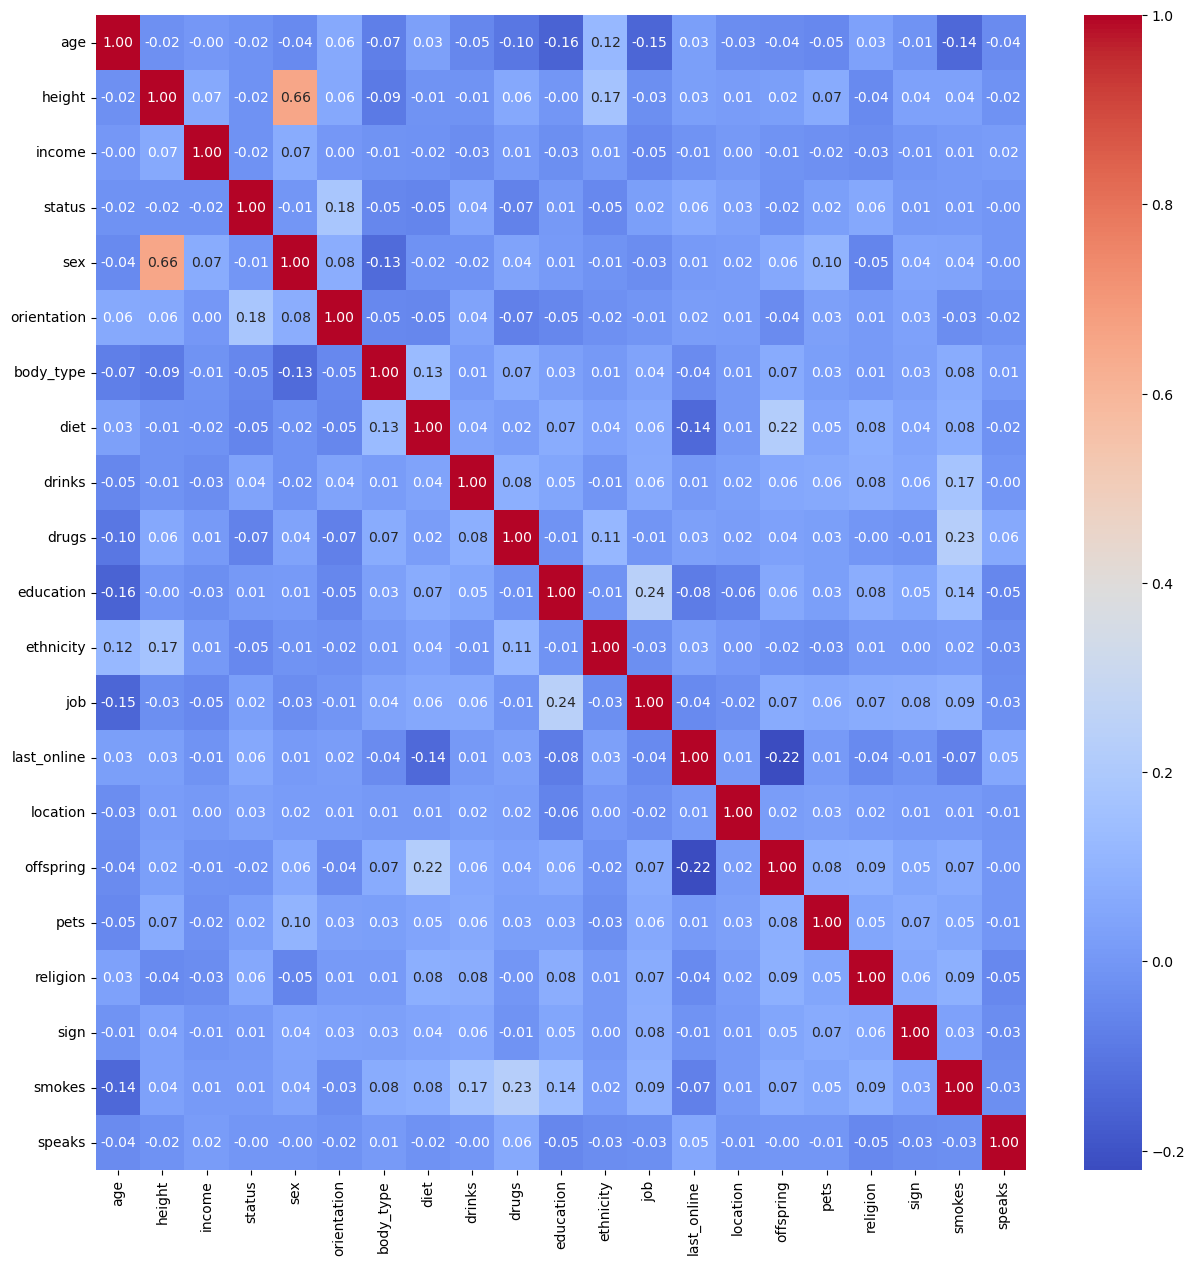

In [21]:
corr_2 = og_fmt.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<Axes: xlabel='sex', ylabel='height'>

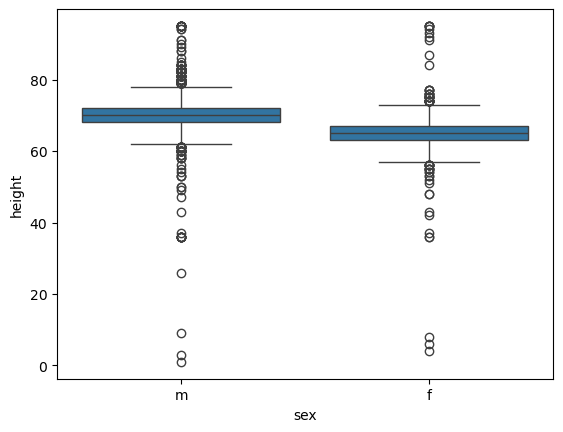

In [23]:
sns.boxplot(x='sex', y='height', data=okc_features)

#### Grouping Data

In [ ]:
isna_df

,Columns,Percentage of missing values
15,offspring,59.0
5,diet,41.0
17,religion,34.0
16,pets,33.0
7,drugs,23.0
18,sign,18.0
12,job,14.0
8,education,11.0
19,smokes,9.0
4,body_type,9.0


In [31]:
uniques_df

,Columns,No. of uniques
10,last_online,30123
17,speaks,7647
8,ethnicity,217
11,location,199
15,sign,48
14,religion,45
7,education,32
9,job,21
4,diet,18
12,offspring,15


In [25]:
okc_features.groupby('sex')['height'].mean()

sex
f    65.103873
m    70.443492
Name: height, dtype: float64

In [30]:
okc_features.groupby('status')['age'].mean()

status
available         33.869169
married           36.516129
seeing someone    29.481589
single            32.371223
unknown           35.500000
Name: age, dtype: float64

In [32]:
okc_features.groupby('status')['income'].mean()

status
available         27859.840751
married           26063.793548
seeing someone    23666.869671
single            19605.809433
unknown            3999.200000
Name: income, dtype: float64

In [33]:
okc_features.groupby('drugs')['age'].mean()

drugs
never        33.195207
often        26.017073
sometimes    29.863813
Name: age, dtype: float64

In [36]:
okc_features.groupby('drugs')['smokes'].count()

drugs
never        35412
often          391
sometimes     7314
Name: smokes, dtype: int64

In [44]:
okc_features.groupby('offspring')['age'].mean().sort_values()

offspring
doesn't have kids, but wants them          30.251613
doesn't have kids                          30.266931
wants kids                                 30.595556
doesn't have kids, but might want them     30.727484
might want kids                            31.774725
has a kid, and wants more                  32.028169
doesn't have kids, and doesn't want any    32.471731
has kids, and wants more                   32.523810
doesn't want kids                          35.317731
has a kid, and might want more             35.571429
has kids, and might want more              38.347826
has a kid                                  42.912281
has kids                                   48.302177
has a kid, but doesn't want more           48.730909
has kids, but doesn't want more            49.864253
Name: age, dtype: float64

In [99]:
# print(okc_features.groupby('education')['income'].mean().sort_values(ascending=False))
okc_feat2 = okc_features.copy()
okc_feat2['education'] = np.where(okc_feat2['education'].str.contains('dropped out'), 'Dropped out',
                                  np.where(okc_feat2['education'].str.contains('graduated'), 'Graduated',
                                           np.where(okc_feat2['education'].str.contains('working on'), 'In education', okc_feat2['education'])))
okc_feat2.groupby('education')['income'].mean().sort_values(ascending=False)

education
space camp            57240.603448
ph.d program          30768.423077
college/university    21222.636704
masters program       20807.911765
In education          20144.476732
Dropped out           19973.982372
Graduated             19958.045840
two-year college      17611.869369
high school           16978.510417
law school            13157.000000
med school               -1.000000
Name: income, dtype: float64

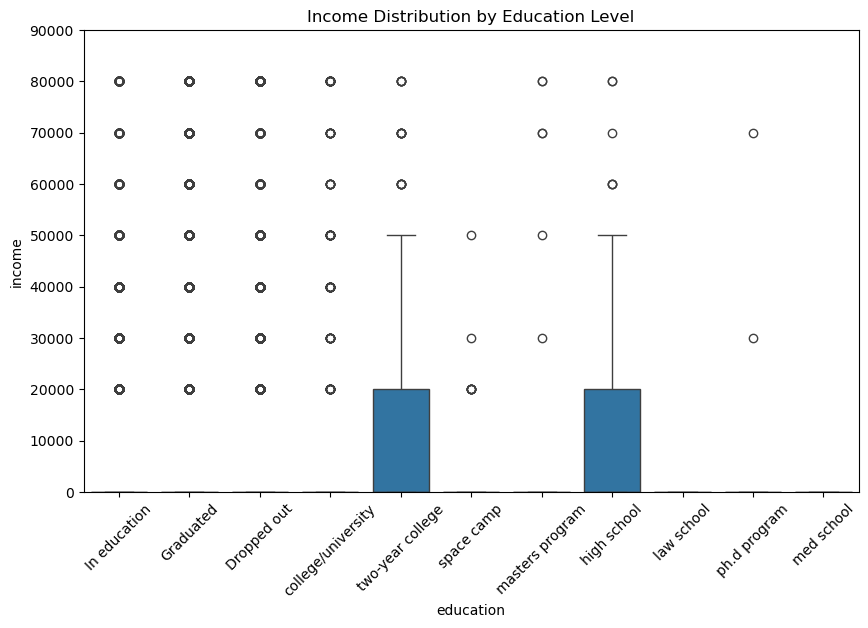

In [100]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='education', y='income', data=okc_feat2)

# Define custom y-axis ticks (adjust values based on data distribution)
plt.ylim(0, 90000)

plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

In [46]:
okc_features[okc_features['status']=='single']['orientation'].value_counts()

orientation
straight    48710
gay          5025
bisexual     1962
Name: count, dtype: int64

In [49]:
okc_features.groupby('sex')['status'].value_counts()

sex  status        
f    single            22319
     seeing someone     1003
     available           656
     married             135
     unknown               4
m    single            33378
     available          1209
     seeing someone     1061
     married             175
     unknown               6
Name: count, dtype: int64

In [58]:
okc_features.groupby('body_type')['age'].mean().sort_values()

body_type
skinny            27.771525
used up           28.642254
jacked            29.847981
thin              31.598811
rather not say    32.045455
athletic          32.049412
curvy             32.055046
average           32.642097
fit               33.530485
full figured      34.050545
a little extra    34.123621
overweight        34.988739
Name: age, dtype: float64